# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [275]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
        #mouse_metadata.head
        #study_results.head 
        #Mouse ID is common to both files

combined_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_df.head


<bound method NDFrame.head of      Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898   

In [276]:
# Checking the number of mice.
combined_df['Mouse ID'].value_counts()

g989    13
k403    10
j365    10
j984    10
k210    10
        ..
v199     1
t573     1
f932     1
b447     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

In [277]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicateRows = combined_df[combined_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicateRows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [278]:
# Optional: Get all the data for the duplicate mouse ID. 


In [279]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clnd_df = combined_df[combined_df['Mouse ID'] != 'g989']

In [280]:
# Checking the number of mice in the clean DataFrame.
clnd_df['Mouse ID'].value_counts()

k403    10
o287    10
j984    10
k210    10
k382    10
        ..
h428     1
o848     1
t573     1
d133     1
x226     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [281]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


tumor_data = clnd_df.groupby(['Drug Regimen'])
# This method is the most straighforward, creating multiple series and putting them all together at the end.
tumor_mean = tumor_data['Tumor Volume (mm3)'].mean()
tumor_med = tumor_data['Tumor Volume (mm3)'].median()
tumor_var = tumor_data['Tumor Volume (mm3)'].var()
tumor_std = tumor_data['Tumor Volume (mm3)'].std()
tumor_sem = tumor_data['Tumor Volume (mm3)'].sem()

tumordata_df = pd.DataFrame({
                        "Mean": tumor_mean,
                        "Median" : tumor_med,
                        "Variance" : tumor_var,
                        "Standard Deviation" : tumor_std,
                        "SEM" : tumor_sem
                        })
tumordata_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [282]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.

statstab2 = clnd_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median','var', 'std', 'sem'])
statstab2



,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

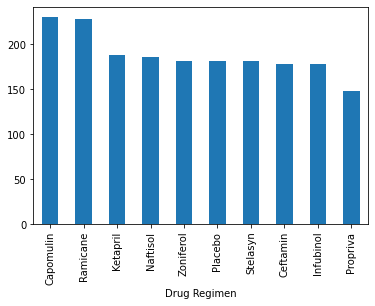

In [283]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

intervalstep = clnd_df.groupby(['Drug Regimen'])['Timepoint'].count()
intervalstep.sort_values(ascending=False).plot.bar()  
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

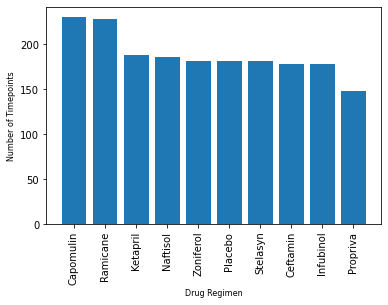

In [284]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
micetotal = intervalstep.sort_values(ascending=False)
plt.bar(micetotal.index, micetotal.values)
plt.ylabel('Number of Timepoints', size=8) # define y label
plt.xlabel('Drug Regimen',size=8) # define x label
plt.xticks(rotation='vertical') # this is to rotate the x values
plt.show


<AxesSubplot:ylabel='Sex'>

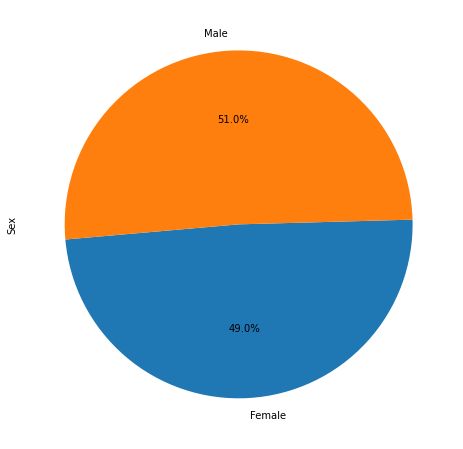

In [285]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

Gender = clnd_df.groupby(['Sex'])['Sex'].count()
gender.plot.pie(startangle=185,autopct='%1.1f%%', figsize=(8, 8))



([<matplotlib.patches.Wedge at 0x246d1a18610>,
 [Text(-0.03308201408261547, 1.0995024239828841, 'Male'),
  Text(0.033082014082615095, -1.0995024239828841, 'Female')],
 [Text(-0.01804473495415389, 0.5997285948997549, '51.0%'),
  Text(0.018044734954153686, -0.5997285948997549, '49.0%')])

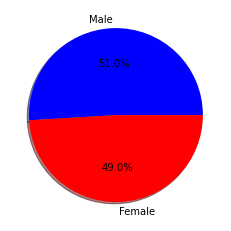

In [286]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

malecount = (clnd_df['Sex'].value_counts()['Male'])
femalecount = (clnd_df['Sex'].value_counts()['Female'])
gendercount = [malecount,femalecount]
#print (gendercount)
gendernames = ['Male','Female']
explode = (0,0)
colors = ['Blue', 'Red']


plt.pie(gendercount, explode=explode, labels=gendernames, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=0)




## Quartiles, Outliers and Boxplots

In [287]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
newclnd_df = clnd_df.copy()

# Start by getting the last (greatest) timepoint for each mouse
finltme = newclnd_df.groupby(['Mouse ID'])['Timepoint'].max()
finltme_df = pd.DataFrame(finltme)
#print(finltme_df)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

newmerged_df = pd.merge(newclnd_df, finltme_df, on=('Mouse ID', 'Timepoint'), how='right')
newmerged_df




,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,Propriva,Female,12,26,10,48.710661,0
244,z578,Ramicane,Male,11,16,45,30.638696,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [288]:
# Put treatments into a list for for loop (and later for plot labels)

treatlist = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

cap_vol = []
ram_vol = []
inf_vol = []
cef_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

for index, row in newmerged_df.iterrows():
    if row["Drug Regimen"] == "Capomulin":
        cap_vol.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == "Ramicane":
        ram_vol.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == "Infubinol":
        inf_vol.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == "Ceftamin":
        cef_vol.append(row['Tumor Volume (mm3)'])
        
        
    # add subset 
regimen_df = pd.DataFrame({'Capomulin':cap_vol,"Ramicane":ram_vol,"Infubinol":inf_vol,"Ceftamin":cef_vol})
    
  # Determine outliers using upper and lower bounds
searchdata1 = regimen_df['Capomulin']
 
quartiles = searchdata1.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Capomulin is: {lowerq}")
print(f"The upper quartile of Capomulin is: {upperq}")
print(f"The interquartile range of Capomulin is: {iqr}")
print(f"The median of Capomulin is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")    
print('-------------------------------------------------')

searchdata2 = regimen_df['Ramicane']
    
quartiles = searchdata2.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ramicane is: {lowerq}")
print(f"The upper quartile of Ramicane is: {upperq}")
print(f"The interquartile range of Ramicane is: {iqr}")
print(f"The median of Ramicane is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")        
print('-------------------------------------------------')    
   
searchdata3 = regimen_df['Infubinol']
    
    
quartiles = searchdata3.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Infubinol is: {lowerq}")
print(f"The upper quartile of Infubinol is: {upperq}")
print(f"The interquartile range of Infubinol is: {iqr}")
print(f"The median of Infubinol is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")  
print('-------------------------------------------------')
    
searchdata4 = regimen_df['Ceftamin']
    
    
quartiles = searchdata4.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ceftamin is: {lowerq}")
print(f"The upper quartile of Ceftamin is: {upperq}")
print(f"The interquartile range of Ceftamin is: {iqr}")
print(f"The median of Ceftamin is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")  
print('-------------------------------------------------')
   


The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The median of Capomulin is: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
-------------------------------------------------
The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
The median of Ramicane is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
-------------------------------------------------
The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
The median of Infubinol is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
----------------------------

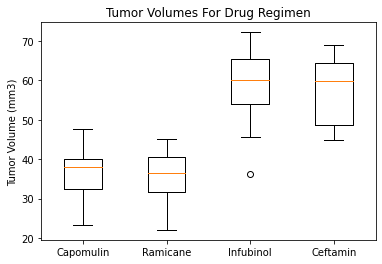

In [289]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

tumvols = [cap_vol,ram_vol,inf_vol,cef_vol]
boxlabels = ['Capomulin','Ramicane','Infubinol','Ceftamin']
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volumes For Drug Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
#ax1.set_xlabel(boxlabels)

ax1.boxplot(tumvols)

plt.xticks([1,2,3,4],boxlabels)

plt.show()

## Line and Scatter Plots

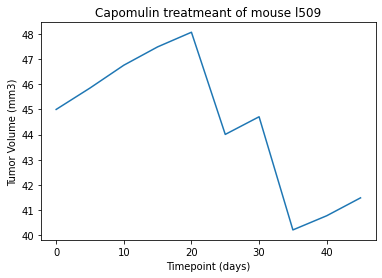

In [290]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
l_plot_df = clnd_df.loc[clnd_df["Mouse ID"] == "l509",:]

time_vals = l_plot_df['Timepoint']
vol_vals = l_plot_df['Tumor Volume (mm3)']
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatmeant of mouse l509')

plt.plot(time_vals,vol_vals)
plt.show()

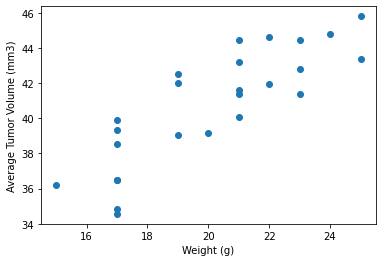

In [291]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

mousewt_df = clnd_df.loc[clnd_df["Drug Regimen"] == "Capomulin",:]
meantumvol = mousewt_df.groupby(['Mouse ID']).mean()
#meantumvol

meantumvol.rename(columns={'Tumor Volume (mm3)':'Tumor_Volume_(mm3)'}, inplace=True)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.scatter(meantumvol['Weight (g)'],meantumvol['Tumor_Volume_(mm3)'])


## Correlation and Regression

In [292]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

corr=round(st.pearsonr(meantumvol['Weight (g)'],meantumvol['Tumor_Volume_(mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")           

x_values = meantumvol['Weight (g)']
y_values = meantumvol['Tumor_Volume_(mm3)']

regmodel=st.linregress(meantumvol['Weight (g)'],meantumvol['Tumor_Volume_(mm3)'])
regmodel

slope = regmodel[0]
intercept = regmodel[1]
rvalue = regmodel[2]
pvalue = regmodel[3]
stderr = regmodel[4]

#Print Summary Table
print()
print('Linear Regression Table')
print('-------------------------------')
print('Slope :',slope)
print('Intercept :',intercept)
print('r-value :',rvalue)
print('p-value :',pvalue)
print('stderr :',stderr)
print('-------------------------------')

                                                           
                                                            

The correlation between mouse weight and average tumor volume is 0.84

Linear Regression Table
-------------------------------
Slope : 0.9544396890241049
Intercept : 21.552160532685008
r-value : 0.8419363424694721
p-value : 1.3225722434712404e-07
stderr : 0.12754359033201323
-------------------------------
